In [1]:
import numpy as np
import os
import pandas as pd
import sklearn.linear_model
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# from __future__ import division, print_function, unicode_literals

In [2]:
datapath = './datasets/lifesat/'

In [3]:
# 加载数据
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
oecd_bli.head()

,"﻿""LOCATION""",Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [4]:
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [5]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] #取出 INEQUALITY = TOT的数据
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") # 整理成透视表
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True) # 修改列名
    gdp_per_capita.set_index("Country", inplace=True) #设置country列为index
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, # 根据index合并两张表
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by='GDP per capita',inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35] #需要删除的行序号
    keep_indices = list(set(range(36)) - set(remove_indices)) #需要保留的行序号
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices] # 返回需要的两列数据

In [6]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats

Indicator,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [7]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

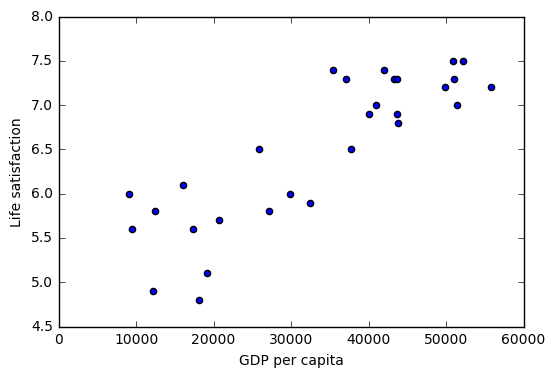

In [9]:
# 可视化
country_stats.plot(kind='scatter',x="GDP per capita", y='Life satisfaction')
plt.show()

In [10]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [11]:
# 训练模型
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new))

[[ 5.96242338]]
